# Import the Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ideal_data = pd.read_csv("Hackathon_Ideal_Data.csv")

In [5]:
ideal_data.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [6]:
mapping_file = pd.read_csv("Hackathon_Mapping_File.csv")

In [7]:
mapping_file.head()

,File Name,Column Name,Column Description
0,Hackathon_Ideal_Data,MONTH,"Month ID (M1, M2, M3)"
1,NaN,STORECODE,"STORE CODE (P1, P2, …, P10)"
2,NaN,QTY,Sales Unit
3,NaN,VALUE,Sales Value
4,NaN,GRP,Category


In [8]:
validation_data = pd.read_csv("Hackathon_Validation_Data.csv")

In [9]:
validation_data.head()

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS


In [10]:
working_data = pd.read_csv("Hackathon_Working_Data.csv")

In [11]:
working_data.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [13]:
# check Ideal Data
ideal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


# Data Processing

In [14]:
# Handling missing values
imputer = SimpleImputer(strategy="mean")
ideal_data_filled = imputer.fit_transform(ideal_data.select_dtypes(include=['int', 'float']))
ideal_data_filled = pd.DataFrame(ideal_data_filled, columns = ideal_data.select_dtypes(include = ['int', 'float']).columns)
ideal_data_filled

,QTY,VALUE
0,25.0,83.0
1,6.0,22.0
2,4.0,15.0
3,15.0,60.0
4,0.0,0.0
...,...,...
14255,0.0,0.0
14256,1.0,62.0
14257,0.0,0.0
14258,0.0,0.0


In [15]:
# info about working data
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [16]:
# Data cleaning, Normalization and Standardization
scaler = StandardScaler()
working_data_scaled = scaler.fit_transform(working_data.select_dtypes(include=['int', 'float']))
working_data_scaled = pd.DataFrame(working_data_scaled, columns = working_data.select_dtypes(include=['int', 'float']).columns)
working_data_scaled

,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.246891,-0.099290,-0.032457,1.332088,2.026060
1,-1.246891,-0.339413,-0.032457,0.230429,0.496399
2,-1.246891,-0.496417,-0.032457,-0.489887,-0.503764
3,-1.246891,-0.315401,-0.032457,0.340595,0.649365
4,-1.246891,-0.479793,-0.032457,-0.413618,-0.397865
...,...,...,...,...,...
26980,1.767885,-0.496417,-0.032457,-0.489887,-0.503764
26981,1.767885,-0.352343,-0.032457,-0.489887,-0.503764
26982,1.767885,-0.352343,-0.022004,-0.405144,-0.503764
26983,1.767885,-0.352343,-0.032457,-0.083121,0.061034


In [17]:
# convert catagorical variables into numerical representation of ideal_data
encoder = OneHotEncoder();
ideal_data_encoded = pd.get_dummies(ideal_data.select_dtypes(include=['object']))

# concatenate numerical and encoded categorical features
ideal_data_processed = pd.concat([ideal_data_filled, ideal_data_encoded], axis=1)
ideal_data_processed

,QTY,VALUE,MONTH_M1,MONTH_M2,MONTH_M3,STORECODE_P1,STORECODE_P10,STORECODE_P2,STORECODE_P3,STORECODE_P4,...,BRD_ZANDU,BRD_ZANDU GEL,BRD_ZANDU ULTRA POWER,BRD_ZATPAT,BRD_ZED BLACK,BRD_ZED BLACK DEEP MOGRA,BRD_ZED BLACK DEEP GULAB,BRD_ZED BLACK MANTHAN,BRD_ZED BLACK PANCHDEEP,BRD_ZOOPY
0,25.0,83.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.0,22.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.0,15.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,15.0,60.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14255,0.0,0.0,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14256,1.0,62.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14257,0.0,0.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14258,0.0,0.0,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Print processed Data

#Ideal data
ideal_data_processed.head()

,QTY,VALUE,MONTH_M1,MONTH_M2,MONTH_M3,STORECODE_P1,STORECODE_P10,STORECODE_P2,STORECODE_P3,STORECODE_P4,...,BRD_ZANDU,BRD_ZANDU GEL,BRD_ZANDU ULTRA POWER,BRD_ZATPAT,BRD_ZED BLACK,BRD_ZED BLACK DEEP MOGRA,BRD_ZED BLACK DEEP GULAB,BRD_ZED BLACK MANTHAN,BRD_ZED BLACK PANCHDEEP,BRD_ZOOPY
0,25.0,83.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.0,22.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.0,15.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,15.0,60.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
#working data
working_data_scaled.head()

,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.246891,-0.099290,-0.032457,1.332088,2.026060
1,-1.246891,-0.339413,-0.032457,0.230429,0.496399
2,-1.246891,-0.496417,-0.032457,-0.489887,-0.503764
3,-1.246891,-0.315401,-0.032457,0.340595,0.649365
4,-1.246891,-0.479793,-0.032457,-0.413618,-0.397865


# Exploratory Data Analysis (EDA):

In [20]:
# import data to visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

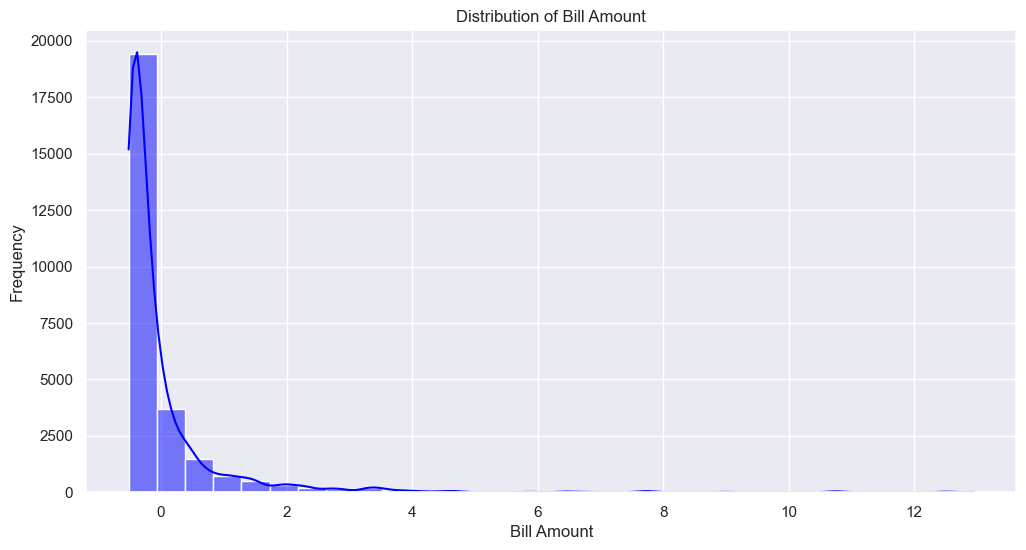

In [21]:
# Visualalize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(data = working_data_scaled['BILL_AMT'], bins=30, kde=True, color='blue')
plt.title("Distribution of Bill Amount")
plt.xlabel("Bill Amount")
plt.ylabel("Frequency")
plt.show()

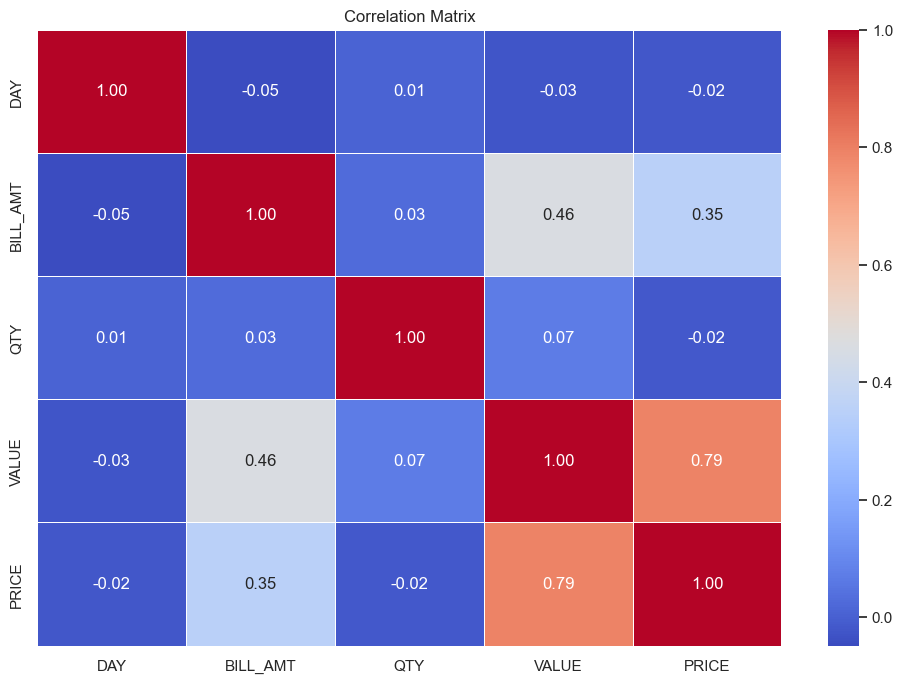

In [22]:
# Explore corellation between different variables
plt.figure(figsize=(12, 8))
correlation_matrix = working_data_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

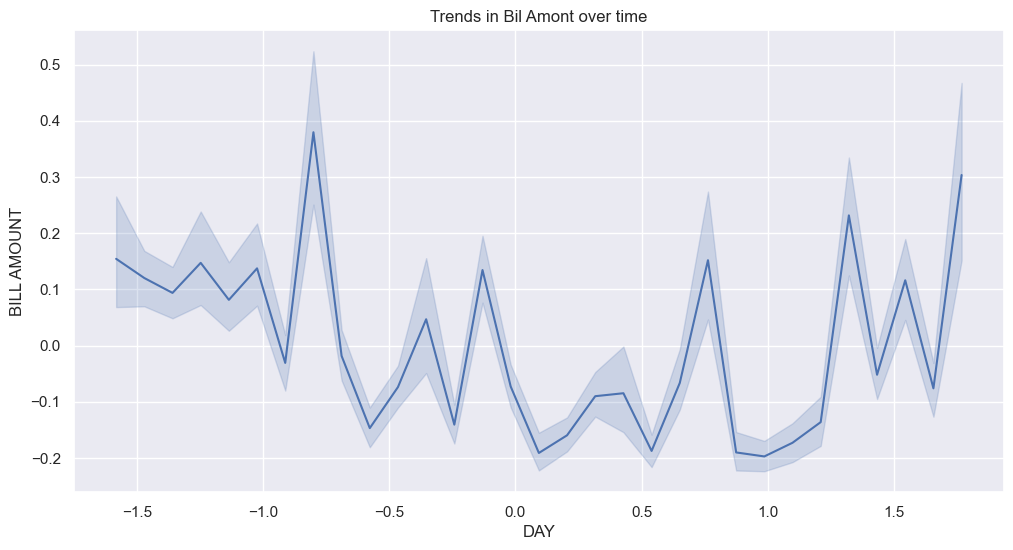

In [23]:
# visualize with Day and Bill Amount
plt.figure(figsize=(12, 6))
sns.lineplot(data=working_data_scaled, x="DAY", y="BILL_AMT")
plt.title("Trends in Bil Amont over time")
plt.xlabel("DAY")
plt.ylabel("BILL AMOUNT")
plt.show()

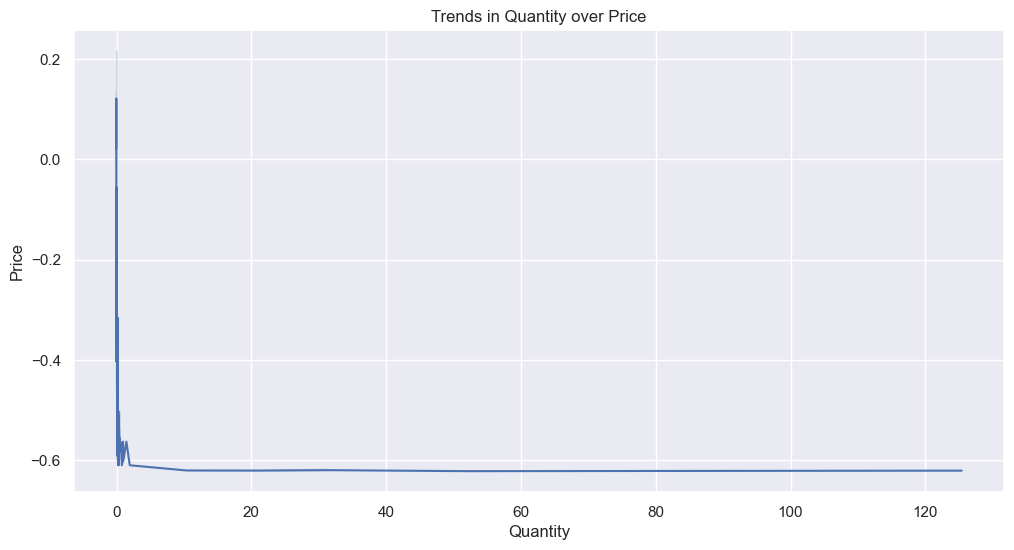

In [24]:
# Visualize with Price and Qty
plt.figure(figsize=(12, 6))
sns.lineplot(data=working_data_scaled, x="QTY", y="PRICE")
plt.title("Trends in Quantity over Price")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.show()

C:\Users\fazil\AppData\Local\Temp\ipykernel_17272\1301164968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ideal_data, y='GRP', order = ideal_data['GRP'].value_counts().index, palette='pastel')


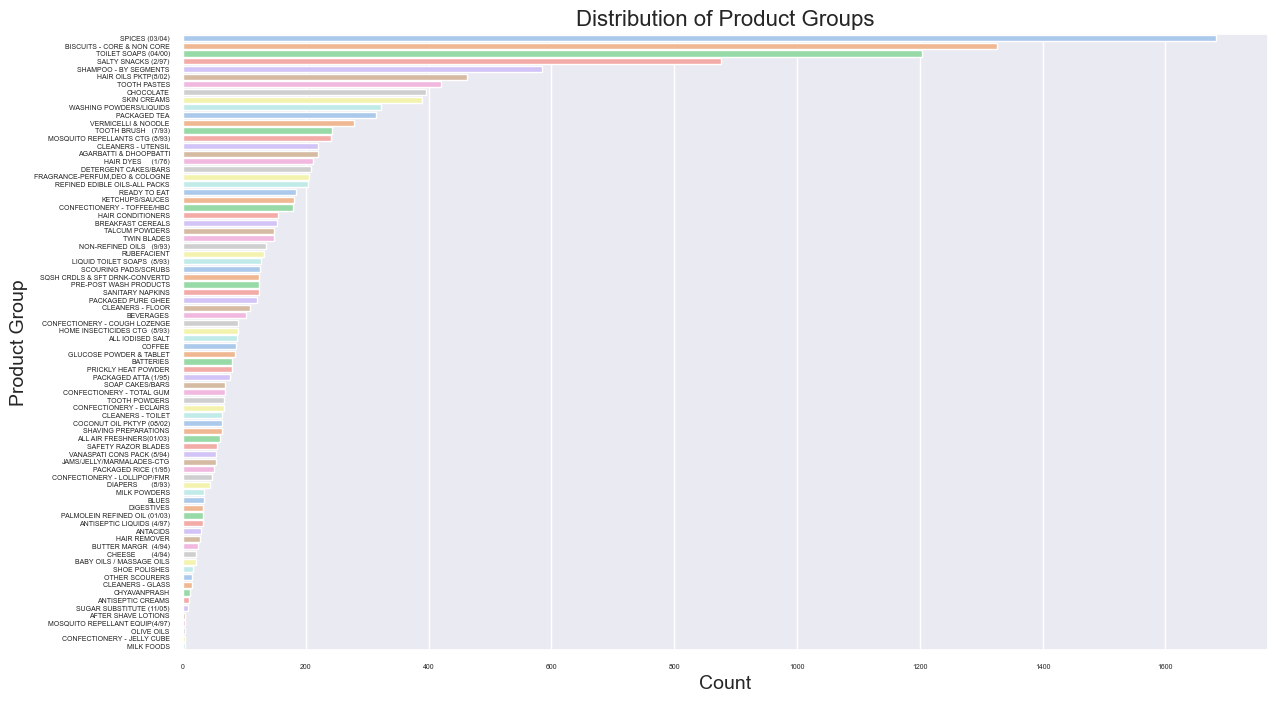

In [25]:
# Visualize the distribution of a catagory variables
plt.figure(figsize=(14, 8))
sns.countplot(data=ideal_data, y='GRP', order = ideal_data['GRP'].value_counts().index, palette='pastel')
plt.title("Distribution of Product Groups", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Product Group", fontsize=14)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

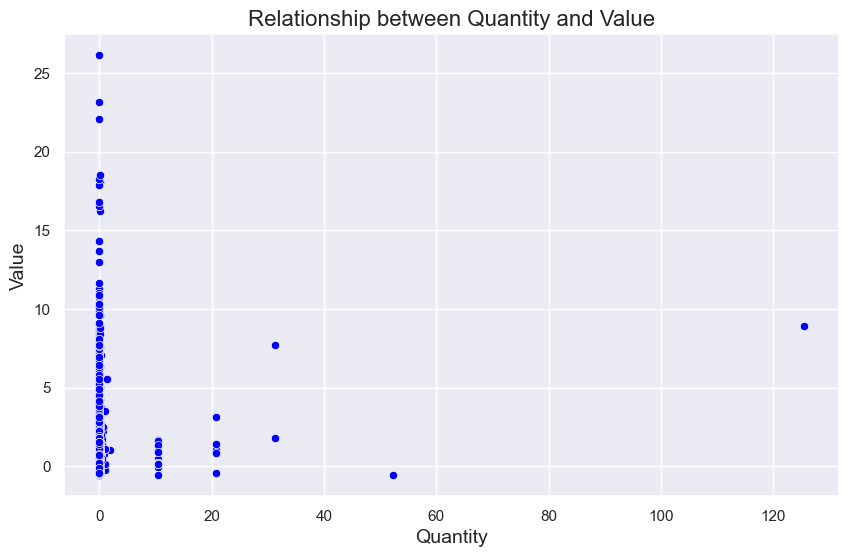

In [26]:
# scatter plot to explore the relationship between two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=working_data_scaled, x="QTY", y="VALUE", color="blue")
plt.title("Relationship between Quantity and Value", fontsize=16)
plt.xlabel("Quantity", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.show()

C:\Users\fazil\AppData\Local\Temp\ipykernel_17272\4155668658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ideal_data, x="MONTH", y="VALUE", palette="pastel")


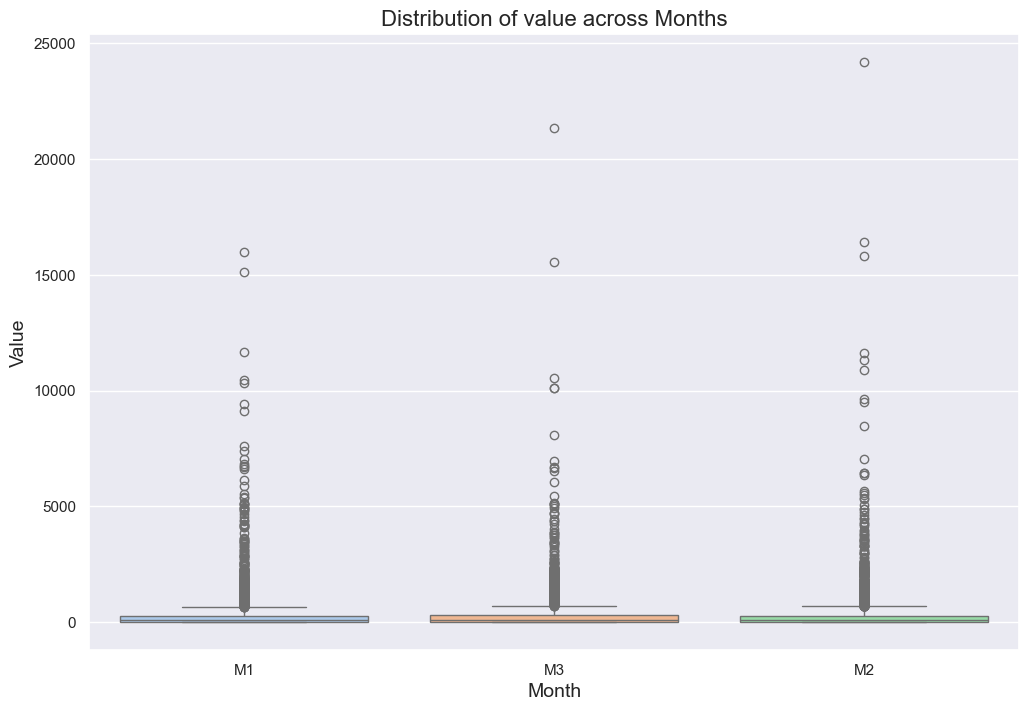

In [27]:
# Blox plot to visualize the distribution of a numerical variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=ideal_data, x="MONTH", y="VALUE", palette="pastel")
plt.title("Distribution of value across Months", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.show()

In [28]:
#checking with the columns
working_data_scaled.columns

Index(['DAY', 'BILL_AMT', 'QTY', 'VALUE', 'PRICE'], dtype='object')

In [29]:
# import the packages
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten

In [30]:
# split the variables into sets
traget = working_data_scaled['PRICE']
x = working_data_scaled.drop(columns=["PRICE"])
y = traget

#reshape the values
x_cnn = x.values.reshape(x.shape[0], x.shape[1], 1)

# split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x_cnn, y, test_size=0.2, random_state=42)

# Creation of Model

In [31]:
# define and compile the model
model = Sequential([
    GRU(units=64, input_shape=(x_train.shape[1], 1)),
    Dense(units=1)
])

model.compile(optimizer="adam", loss="mse")

model_2 = Sequential([
    LSTM(units=64, input_shape=(x_train.shape[1], 1)),
    Dense(units=1)
])

model_2.compile(optimizer = "adam", loss="mse")

model_3 = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu",
          input_shape=(x_train.shape[1], 1)), Flatten(), Dense(units=1)
])

model_3.compile(optimizer="adam", loss="mse")

C:\Users\fazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\fazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [32]:
# Train the model
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.6545 - val_loss: 0.2524
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2487 - val_loss: 0.2583
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3071 - val_loss: 0.2370
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4482 - val_loss: 0.2346
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3234 - val_loss: 0.2409
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2256 - val_loss: 0.2507
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2027 - val_loss: 0.2289
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5101 - val_loss: 0.2238
Epoch 9/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2345 - val_loss: 0.2290
Epoch 10/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2895 - val_loss: 0.2201
Epoch 11/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2166 - val_loss: 0.2051
Epoch 12/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [33]:
model_2.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5672 - val_loss: 0.2513
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3072 - val_loss: 0.2460
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3320 - val_loss: 0.2379
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2743 - val_loss: 0.2414
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2658 - val_loss: 0.2355
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2298 - val_loss: 0.2411
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3336 - val_loss: 0.2318
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2436 - val_loss: 0.2362
Epoch 9/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2156 - val_loss: 0.2274
Epoch 10/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5035 - val_loss: 0.2192
Epoch 11/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2686 - val_loss: 0.2130
Epoch 12/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [34]:
model_3.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4040 - val_loss: 0.2629
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2857 - val_loss: 0.2520
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3311 - val_loss: 0.2467
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3238 - val_loss: 0.2365
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2940 - val_loss: 0.2339
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2503 - val_loss: 0.2272
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2721 - val_loss: 0.2199
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2012 - val_loss: 0.2077
Epoch 9/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2409 - val_loss: 0.2040
Epoch 10/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2063 - val_loss: 0.2043
Epoch 11/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2655 - val_loss: 0.1979
Epoch 12/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

# Evaluvate the Model

In [35]:
model_loss = model.evaluate(x_test, y_test)
model_2_loss = model.evaluate(x_test, y_test)
model_3_loss = model.evaluate(x_test, y_test)

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225


In [36]:
model_loss

0.02474893629550934

In [37]:
model_2_loss

0.02474893629550934

In [38]:
model_3_loss

0.02474893629550934

# Model Training

In [39]:
from sklearn.model_selection import train_test_split

# split the data into X and Y
x = working_data_scaled.drop(columns=["PRICE"])
y = working_data_scaled["PRICE"]

# split the data into trainig anbd test set
x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

model_4 = Sequential([
    GRU(units=64, input_shape=(x_train.shape[1], 1)),
    Dense(units=1)
])

# compile the model
model_4.compile(optimizer="adam", loss="mse")

# train the model
model_4_history = model_4.fit(x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1)),
                             y_train.values, epochs=10, batch_size=32,
                             validation_data=(x_val.values.reshape((x_val.shape[0], x_val.shape[1], 1)), y_val.values))

test_loss = model_4.evaluate(x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1)), y_test.values)
print("Model_4 Test Loss: ", test_loss)

Epoch 1/10


C:\Users\fazil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4386 - val_loss: 0.2549
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2389 - val_loss: 0.2771
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2267 - val_loss: 0.2742
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3180 - val_loss: 0.2577
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3353 - val_loss: 0.2585
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2628 - val_loss: 0.2375
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3131 - val_loss: 0.2514
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3189 - val_loss: 0.2538
Epoch 9/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3182 - val_loss: 0.2468
Epoch 10/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1721 - val_loss: 0.2176
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2810
Model_4 Test Loss:  0.22131627798080444


# Visualize the Model

127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


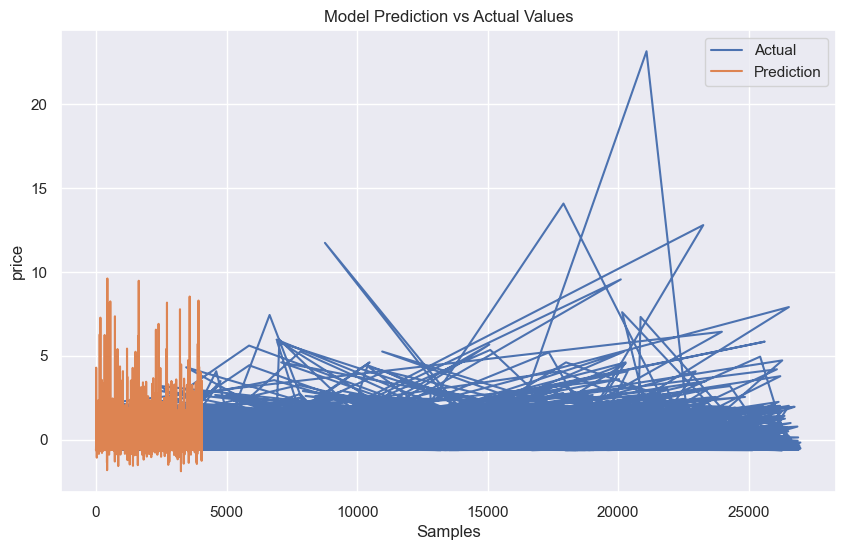

In [40]:
y_pred = model_4.predict(x_test)
y_true = y_test

# visualize Model outputs

plt.figure(figsize=(10, 6))
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Prediction")
plt.title("Model Prediction vs Actual Values")
plt.xlabel("Samples")
plt.ylabel("price")
plt.legend()
plt.show()

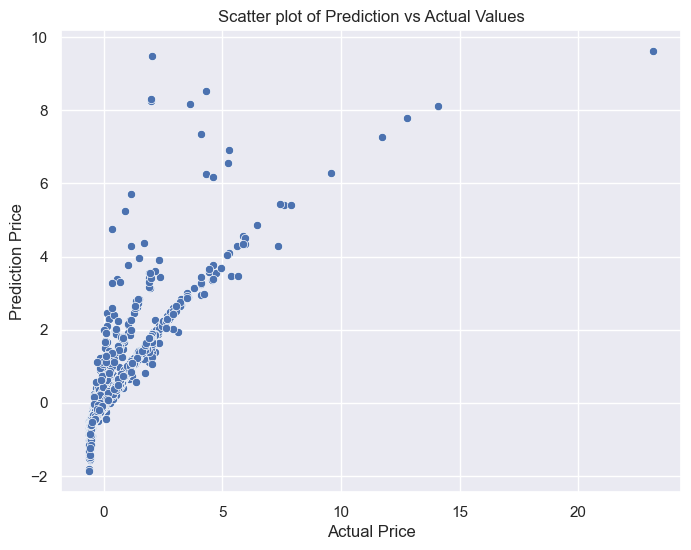

In [41]:
# scatter plot of predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true.values.flatten(), y=y_pred.flatten())
plt.title("Scatter plot of Prediction vs Actual Values")
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.show()

In [42]:
# find the mean_absolute_error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  0.15474911125566612


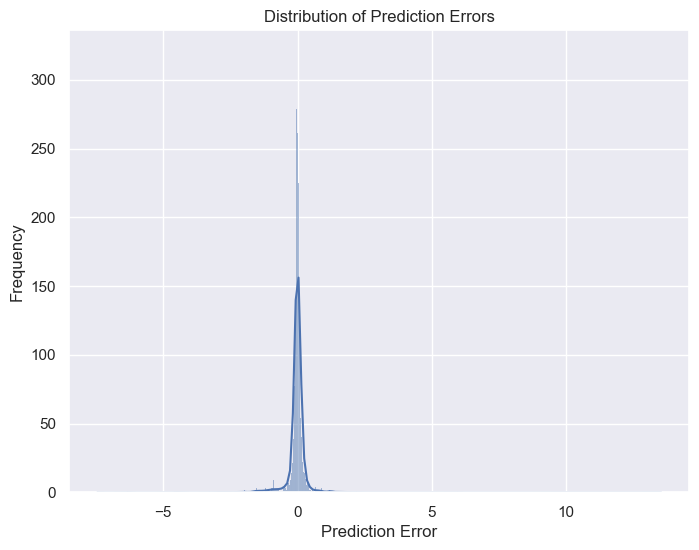

In [43]:
errors = (y_true.squeeze() - y_pred.squeeze())
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

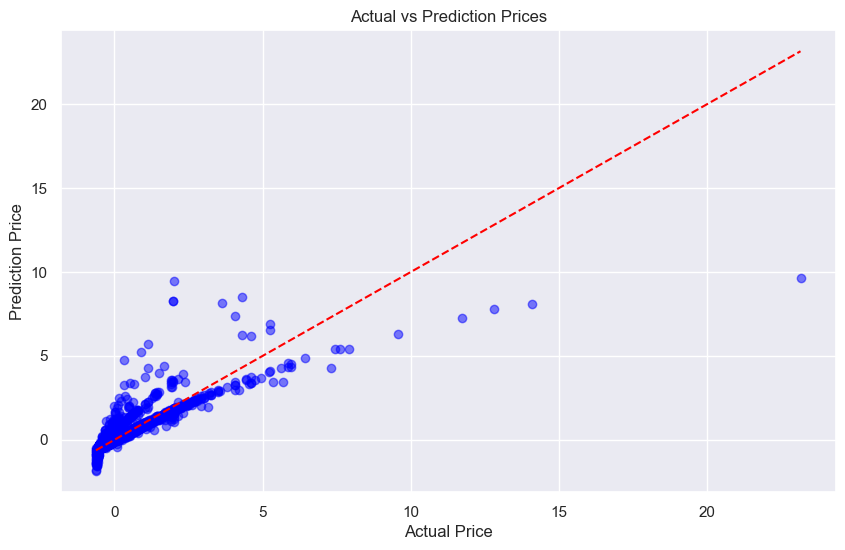

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)],
        color='red', linestyle='--')
plt.title("Actual vs Prediction Prices")
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.show()

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

In [46]:
df = working_data_scaled
x = df.drop(columns = ["PRICE"])
y_true = df["PRICE"]
pred_model = model_4
y_pred = pred_model.predict(x)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error: ", rmse)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Root Mean Squared Error:  0.465508353969116


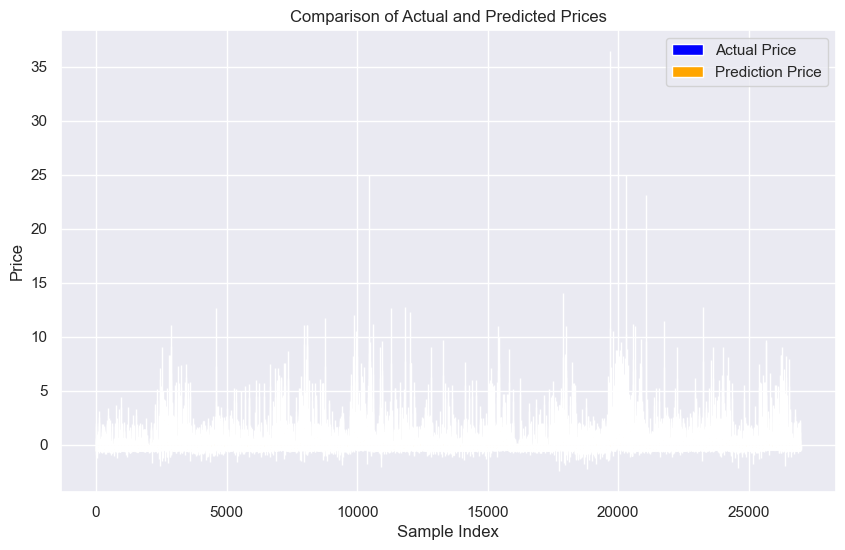

In [47]:
# visualize the data
plt.figure(figsize=(10, 6))
bar_width = 0.35
plt.bar(np.arange(len(y_true)), y_true, width=bar_width, label="Actual Price", color="blue")
plt.bar(np.arange(len(y_pred)) + bar_width, y_pred.flatten(), width=bar_width, label="Prediction Price", color="orange")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Comparison of Actual and Predicted Prices")
plt.legend()
plt.show()

In [48]:
validation_df = pd.read_csv("Hackathon_Validation_Data.csv")
validation_df.head()

In [49]:
df = working_data_scaled
x = df.drop(columns = ["PRICE"])
y_true = df["PRICE"]
y_pred = model_4.predict(x)
print("Shape of y_pred: ", y_pred.shape)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Shape of y_pred:  (26985, 1)


In [51]:
print(validation_df['ID'].shape)
print(y_pred.shape)

(2430,)
(26985, 1)


In [54]:
y_prediction = y_pred[:len(validation_df['ID'])]
y_pred_int = np.round(y_prediction).astype(int)
y_pred_int[y_pred_int < 0] = 0

final_df = pd.DataFrame({
    'ID' : validation_df['ID'], 
    'TOT ALVALUE':y_pred_int.flatten()
})

# Predicted Value

In [56]:
final_df.head()

,ID,TOT ALVALUE
0,1112535,2
1,1112539,0
2,1112543,0
3,1112547,0
4,1112551,0
